In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [5]:
df["sex"] = le.fit_transform(df["sex"])
df["smoker"] = le.fit_transform(df["smoker"])
df["region"] = le.fit_transform(df["region"])

In [6]:

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


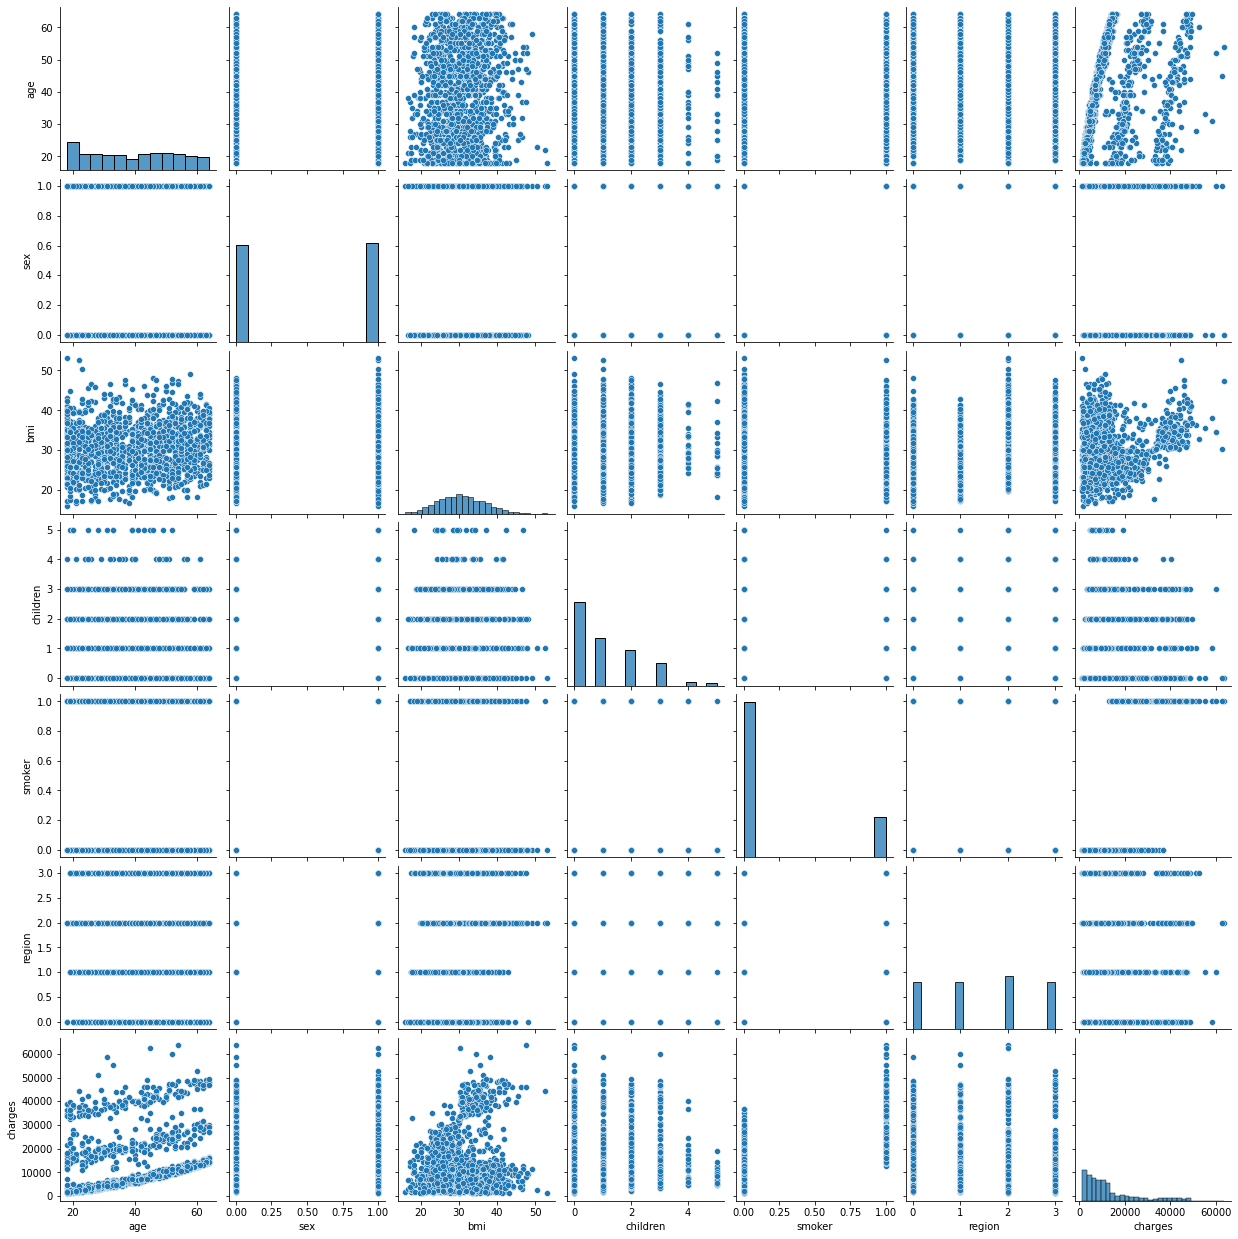

In [7]:
sns.pairplot(df)

<AxesSubplot:>

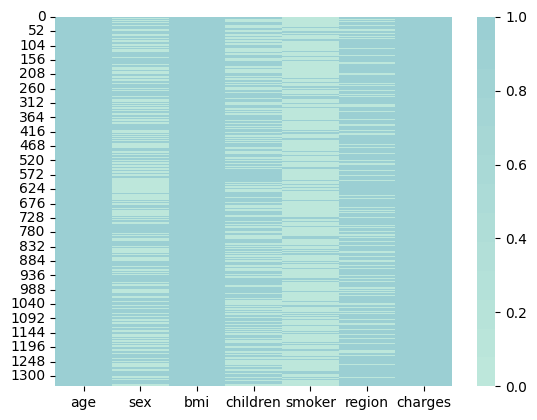

In [8]:
sns.heatmap(df,vmin=0, vmax=1, center=10)

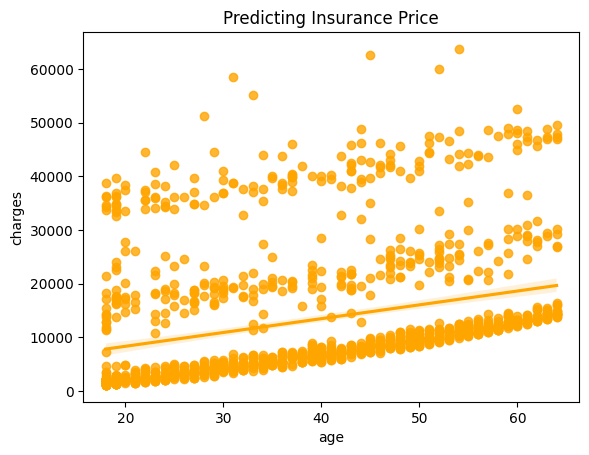

In [9]:
grp = sns.regplot(x='age', y='charges', data=df, color='orange')
plt.title("Predicting Insurance Price")
plt.show()

In [10]:
x = df[["age","sex","bmi","children","smoker","region"]]
y = df["charges"]

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.8, random_state=101)

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test= sc.transform(x_test)

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [14]:
lr.fit(x_train,y_train)

LinearRegression()

In [15]:
prediction = lr.predict(x_test)

In [16]:
prediction

array([11722.63988974,  4017.11897498, 11206.30014091, ...,
        5376.95847101,  4038.05303617, 14275.29531612])

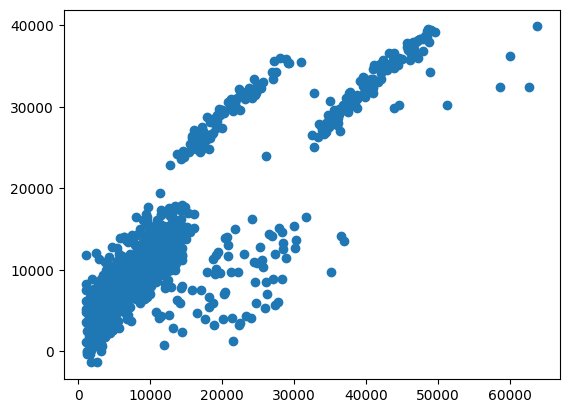

In [17]:
plt.scatter(y_test,prediction)